# 1 - Clean images & augment them

In [8]:
import os
from PIL import Image
import imgaug.augmenters as iaa
import numpy as np

source_directory = './pokemon'
target_directory = './pokemon-augmented-clean'

def convert_images_to_jpeg(source_dir, target_dir):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    for root, dirs, files in os.walk(source_dir):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif', 'tiff')):
                file_path = os.path.join(root, file)
                with Image.open(file_path) as img:
                    img = img.convert('RGB')
                    relative_path = os.path.relpath(root, source_dir)
                    target_subdir = os.path.join(target_dir, relative_path)
                    if not os.path.exists(target_subdir):
                        os.makedirs(target_subdir)
                    
                    target_file_path = os.path.join(target_subdir, f"{os.path.splitext(file)[0]}.jpg")
                    
                    img.save(target_file_path, 'JPEG')

def augment_images(directory, num_augmentations=5):
    aug = iaa.Sequential([
        iaa.Fliplr(0.5),  
        iaa.Flipud(0.2), 
        iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},  
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
            rotate=(-45, 45),  
            shear=(-16, 16)  
        ),
        iaa.GaussianBlur(sigma=(0, 3.0)),  
        iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),  
        iaa.AdditiveLaplaceNoise(scale=(0, 0.05*255)),  
        iaa.AdditivePoissonNoise(lam=(0, 40)),  
        iaa.Multiply((0.8, 1.2)),  
        iaa.LinearContrast((0.8, 1.2))  
    ])

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('jpg', 'jpeg')):
                file_path = os.path.join(root, file)
                with Image.open(file_path) as img:
                    img_array = np.array(img)

                    for i in range(num_augmentations):
                        # Apply augmentation
                        augmented_image = aug(image=img_array)

                        # Save the augmented image
                        aug_img_pil = Image.fromarray(augmented_image)
                        aug_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}_aug{i}.jpg")
                        aug_img_pil.save(aug_file_path)


In [9]:
convert_images_to_jpeg(source_directory, target_directory)
augment_images(target_directory)

/opt/homebrew/Caskroom/miniconda/base/envs/tfml/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


# 2 - Show how it will augment the images

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def display_augmented_images(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for dir in dirs[:6]:  # First 6 directories
            dir_path = os.path.join(root, dir)
            augmented_images = []
            for file in os.listdir(dir_path):
                if file.lower().endswith(('jpg', 'jpeg')) and 'aug' in file:
                    file_path = os.path.join(dir_path, file)
                    img = Image.open(file_path)
                    augmented_images.append(np.array(img))
                if len(augmented_images) == 3:  # First 3 images
                    break
            
            if augmented_images:
                fig, axs = plt.subplots(1, 3, figsize=(15, 5))
                for ax, img in zip(axs, augmented_images):
                    ax.imshow(img)
                    ax.axis('off')
                plt.show()
                count += 1
            if count >= 6:  # First 6 directories
                return

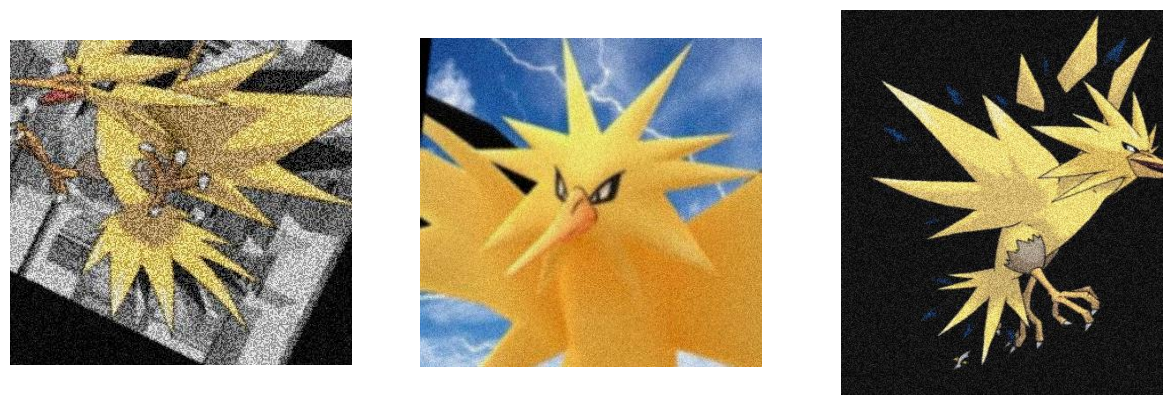

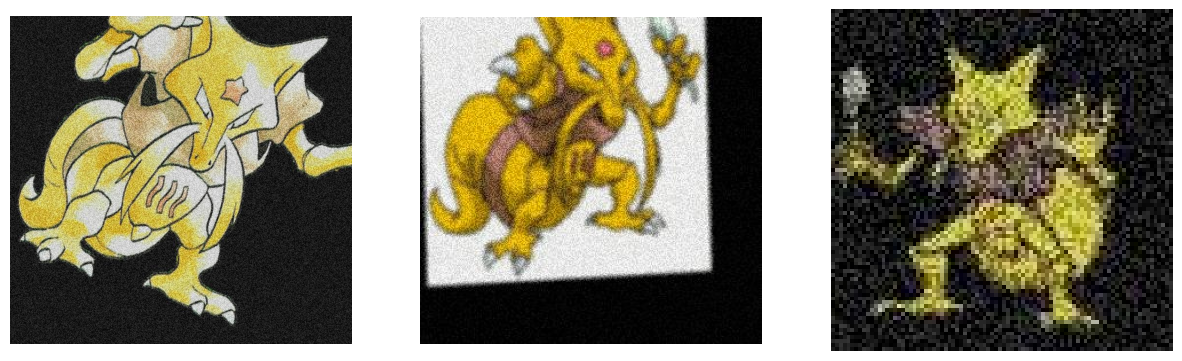

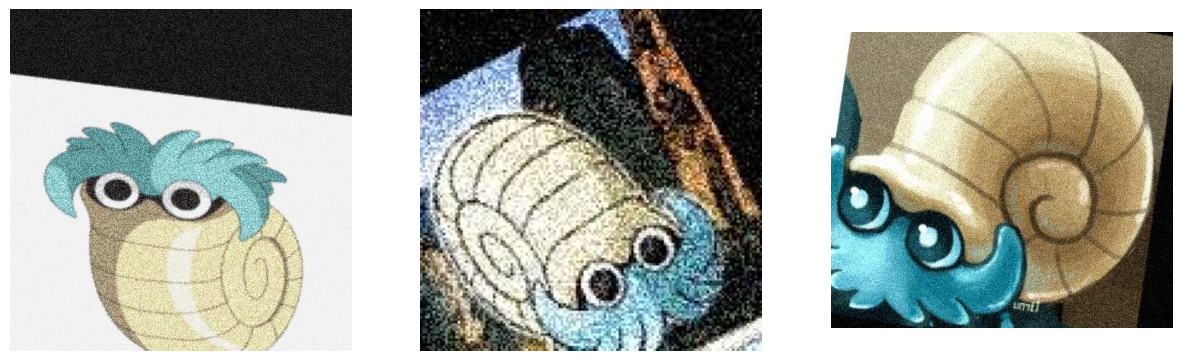

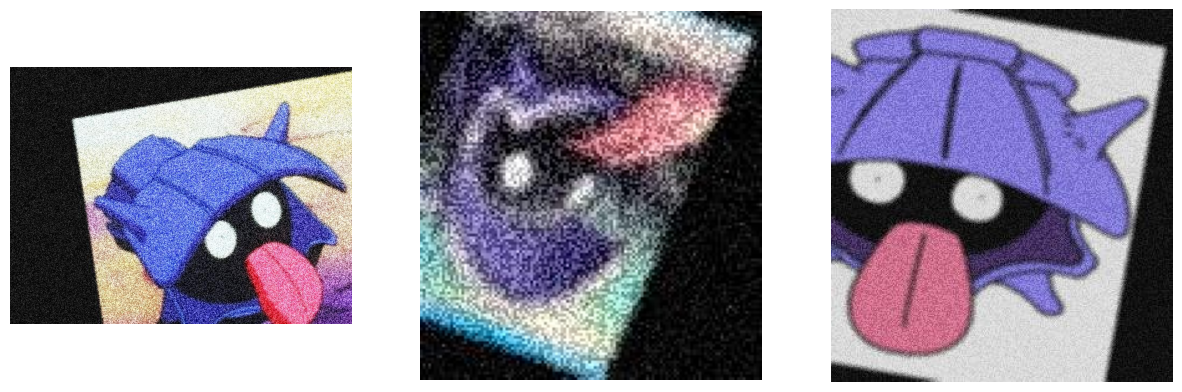

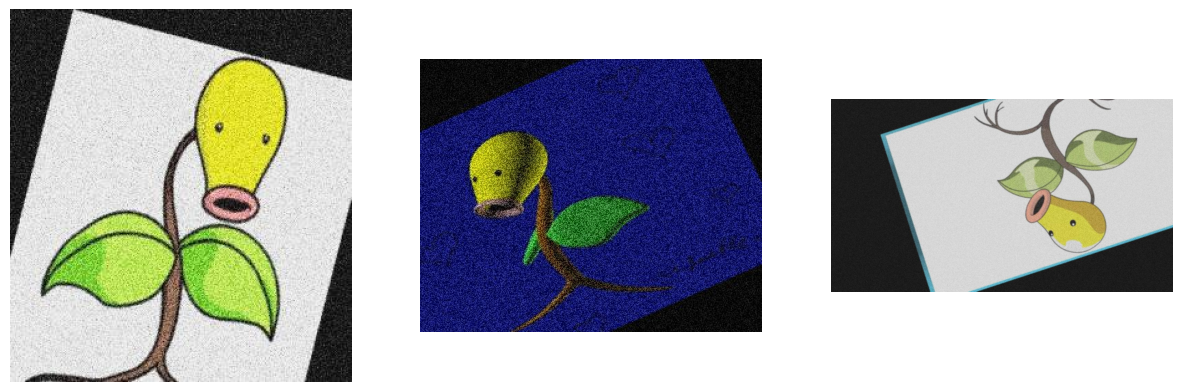

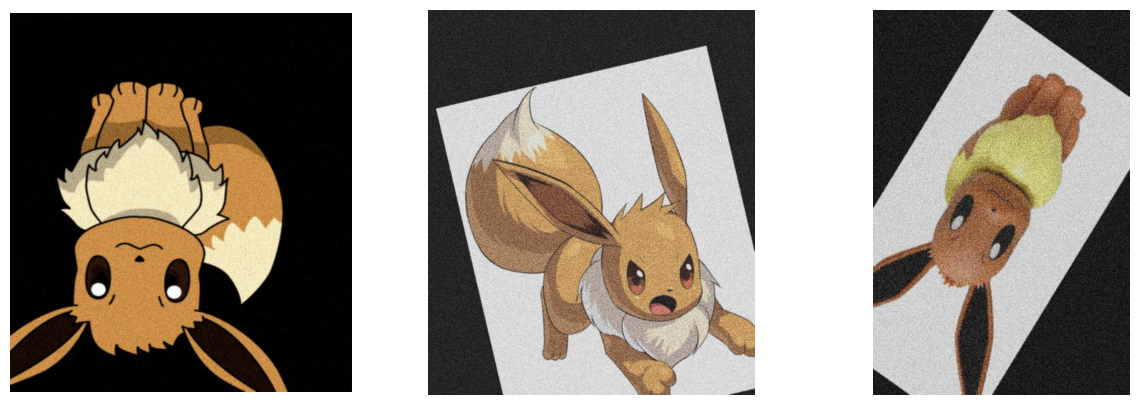

In [16]:
display_augmented_images(target_directory)